#**ANALYSE DU JEU DE DONNEES/DATASET ANALYSIS**

**1 - IMPORTATION DES BIBLIOTHEQUES - LIBRARY'S IMPORTATION**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**2 - AFFICHAGE DES DONNEES - DATA DISPLAY**

In [4]:
#We load the dataset excel file
dataset = pd.read_excel("/content/sample_data/dataset_ms_ls.xlsx")
dataset = dataset.drop(['Artistes','url','songs','image_path'], axis=1)
dataset.head()

,id,Streamed/Non-Streamed,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0DEJ9GEuWuGFMR1GhPORnY,0,0.633,0.690,7,-4.397,1,0.0298,0.02460,0.000005,0.1310,0.631,103.003,4
1,15HNdxGKNCIO9pgaY4n7FU,1,0.538,0.869,8,-3.464,1,0.0275,0.04700,0.000000,0.1400,0.369,91.972,4
2,0GONea6G2XdnHWjNZd6zt3,1,0.509,0.834,2,-6.205,1,0.0386,0.01830,0.000000,0.0732,0.774,139.130,4
3,2V3mQTPHYkxbkYxXMjnKFA,0,0.834,0.878,7,-3.369,1,0.1200,0.00313,0.149000,0.2460,0.315,102.043,4
4,4FmiciU3ZmfgABlbCSXcWw,1,0.390,0.302,8,-8.687,1,0.0321,0.98400,0.000000,0.0871,0.422,82.520,4


**3 - STATISTIQUES DESCRIPTIVES DES DONNEES - DESCRIPTIVE STATISTICS OF DATA**

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     300 non-null    object 
 1   Streamed/Non-Streamed  300 non-null    int64  
 2   danceability           300 non-null    float64
 3   energy                 300 non-null    float64
 4   key                    300 non-null    int64  
 5   loudness               300 non-null    float64
 6   mode                   300 non-null    int64  
 7   speechiness            300 non-null    float64
 8   acousticness           300 non-null    float64
 9   instrumentalness       300 non-null    float64
 10  liveness               300 non-null    float64
 11  valence                300 non-null    float64
 12  tempo                  300 non-null    float64
 13  time_signature         300 non-null    int64  
dtypes: float64(9), int64(4), object(1)
memory usage: 32.9+ KB


La base de données contient 300 lignes et 13 colonnes.


*   id : L'identifiant de la piste sonore sur Spotify / Song's name identifier in Spotify
*   Streamed/Non streamed : 1 pour un son beaucoup Streamé et 0 sinon / 1 if the songs is much streamed and 0 else
*   Danceability : Une mesure entre 0.0 et 1.0 donnant les chances d'un son d'être dansant / A measure between 0.0 and 1.0 describing the ability of a song to make dance
*   Energy : Mesure de l'intensité d'activité entre 0.0 et 1.0 / A measure that represents the intensity and activity - Range 0.0 - 1.0
*   Key : La gamme d'un son - Song's key : Range -1 to 11 (-1 no key, 0 = C/DO, 1 = C#/DO# ...)
*   Loudness : Amplitude moyenne du signal - Song's Amplitude in Decibels
*   Mode : Mineur (0) ou Majeur (1) (Minor or Major) - 0 or 1
*   Speechness : Présence des mots - Presence of spoken words - Range 0.0 - 1.0
*   Acousticness : probabilité qu'un son soit acoustique - song's acousticness - Range 0.0 - 1.0
*   Instrumentalness : Mesure de l'instrumentalité - Range 0.0 ou 1.0
*   Liveness : Présence d'audience - Presence of audience
Range 0.0 - 1.0
*   Valence : Positivité du son/Musical positiveness - Range 0.0 - 1.0
*   Tempo : battement par minutes - Beats per Minute
*   Time signature/Métrique : Nombre de beats par mesure - Beats per bar
Range 3-7















In [6]:
#We calculate the descriptive stats
dataset.describe()

,Streamed/Non-Streamed,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,300.000000,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.500000,0.630837,0.65432,5.250000,-7.144693,0.606667,0.086952,0.283058,0.018788,0.183748,0.597725,119.873787,3.916667
std,0.500835,0.161393,0.19576,3.504536,3.107084,0.489306,0.081634,0.286254,0.097816,0.156430,0.246492,29.720474,0.404476
min,0.000000,0.136000,0.06000,0.000000,-19.917000,0.000000,0.024900,0.000142,0.000000,0.036900,0.038200,58.303000,1.000000
25%,0.000000,0.531750,0.52550,2.000000,-8.744750,0.000000,0.036275,0.044700,0.000000,0.093550,0.392500,97.250500,4.000000
50%,0.500000,0.640500,0.67400,5.500000,-6.482000,1.000000,0.051350,0.163500,0.000005,0.119500,0.613500,117.549000,4.000000
75%,1.000000,0.753250,0.81125,8.000000,-4.953250,1.000000,0.097350,0.463250,0.000398,0.214750,0.799250,136.057750,4.000000
max,1.000000,0.923000,0.98000,11.000000,-1.763000,1.000000,0.422000,0.987000,0.916000,0.973000,0.973000,199.907000,5.000000


**4 - VISUALISATION ET ANALYSE - DATA VISUALIZATION AND ANALYSIS**

Remarque : Toutes ces analyses ont été faites sur un échantillon assez faible. On ne peut que faire des suppositions à partir de ces graphes./ Note : All these analyses were carried out on a fairly small sample. We can only make assumptions based on these graphs.

In [13]:
def plot_continuous_variables(data,columns_name, hue):
  column_number = len(columns_name)
  if column_number%3 == 0:
    fig_row = column_number//3
  else:
    fig_row = column_number//3 + 1
  fig, axes = plt.subplots(fig_row, 3, figsize=(20, 10))
  fig.suptitle(f'KDE of continuous variables')
  column_inc = 0
  for i in range(fig_row):
    for j in range(3):
      try:
        sns.kdeplot(data=data, x=columns_name[column_inc], hue=hue, ax=axes[i,j])
        axes[i,j].set_xlabel(columns_name[column_inc])
        column_inc += 1
      except:
        pass

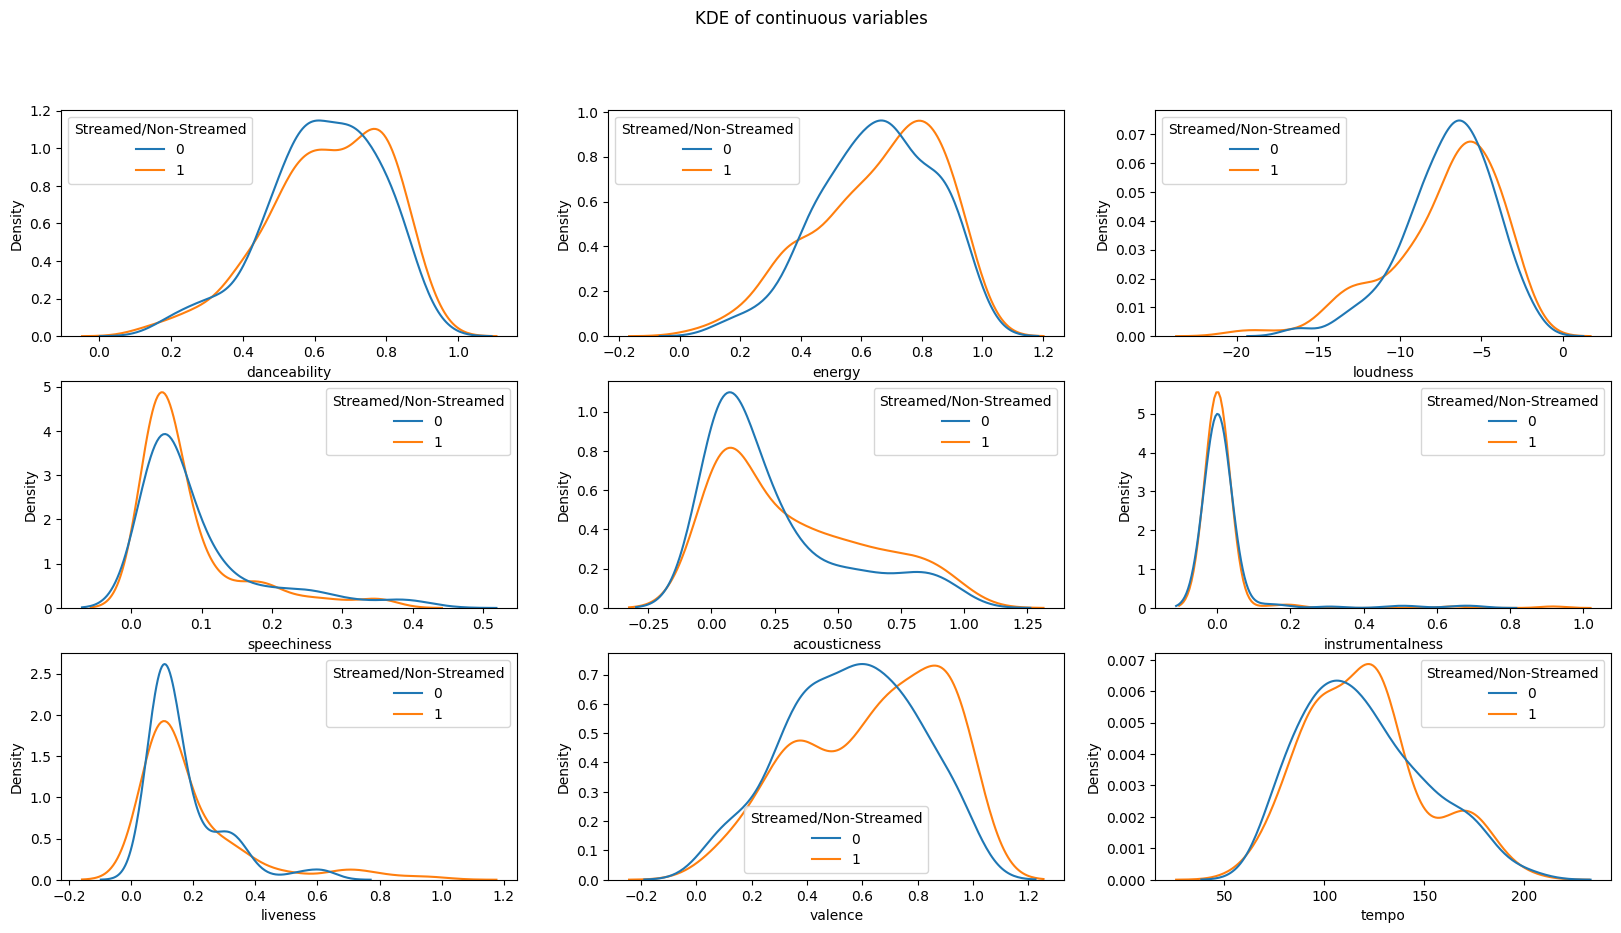

In [14]:
columns_name = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
plot_continuous_variables(dataset, columns_name, 'Streamed/Non-Streamed')

**Analyse des variables continues/ Continuous variables analysis**



1.   *Dansabilité/Danceability* : On remarque que la densité de la dansabilité pour les sons streamés est légèrement en dessous de celles des sons streamés lorsque celle ci est inférieure à 0.6. On remarque néanmoins un pic de densité autour de 0.8 pour les sons streamés. / We note that the density of danceability for streamed sounds is slightly below that of streamed sounds when it's less than 0.6. Nevertheless, there is a density peak around 0.8 for streamed sounds.


2.   *Energie/Energy* : Les sons streamés ont un pic de densité d'énergie autour de 0.8, contre 0.6 pour les non streamés. Les sons streamés semblent être beaucoup plus énergiques que les non streamés. / Streamed sounds have a peak energy density of around 0.8, compared with 0.6 for unstreamed sounds. Streamed sounds seem to be much more energetic than unstreamed ones.


3.   *Loudness/Intensité Sonore* : La courbe de densité des non streamés est au-dessus  de celle des streamés principalement entre [-10dB et -5dB]. / The density curve of non-streamers is above that of streamers mainly between [-10dB and -5dB].


4.   *Speechness* : La densité de la speechness des streamés est très au-dessus de celle des non streamés entre 0.0 et 0.1. La majorité des sons streamés semblent avoir moins de speechness en général. / The speechness density of streamed sounds is well above that of unstreamed sounds, between 0.0 and 0.1. The majority of streamed sounds seem to have less speechness overall.


5.   *Acousticness* : Les sons streamés ont un pic de densité inférieur à celui des non streamés lorsque les sons ne pas très acoustiques. Mais on retrouve plus d'acoustique dans les streamés lorsque celle ci augmente. / Streamed sounds have a lower peak density than non-streamed sounds when the sounds are not very acoustic. But as acoustics increase, so do the acoustics of streamed sounds.


6.   *Instrumentalness/Instrumentalité* : Les streamés et non streamés ont tous les deux un pic de densité aux mêmes valeurs instrumentalness. Celle des streamés est légèrement plus élevée. Cette caractéristique ne sera pas forcément discrimative lors de la modélisation. / Both streamers and non-streamers have a density peak at the same instrumentalness values. That of streamers is slightly higher. This characteristic is not necessarily discriminatory when modeling.


7.   *Liveness* : On peut affirmer que sur la quasi-entièreté du graphe, la densité de liveness est beaucoup plus faible sur les streamés. On pouvait s'attendre à ça, les morceaux qu'on écoute en général ont été mixés dans un studio. / On almost the entire graph, the liveness density is much lower on the streamed tracks. This is to be expected, as the tracks we listen to are usually mixed in a studio.


8.   *Valence* : On remarque que la densité de valence des sons streamés est plus élevée lorsque la valence augmente. Les morceaux streamés semblent être des morceaux plus positifs, joyeux que les non streamés. / On almost the entire graph, the liveness density is much lower on the streamed tracks. This is to be expected, as the tracks we listen to are usually mixed in a studio.


9.   *Tempo* : On observe un pic de densité pour les sons streamés autour de 130-140 bpm, qu'on peut considérer(si on faisait une discrétisation selon les quantiles) comme tempo rapide. Pour les non streamés, le pic est autour de 100 bpm, donc tempo modéré. / There's a density peak for streamed sounds around 130-140 bpm, which (if discretized by quantile) could be considered fast tempo. For unstreamed sounds, the peak is around 100 bpm, so moderate tempo.












In [16]:
def plot_categorical_variables(data,columns_name, hue):
  column_number = len(columns_name)
  fig, axes = plt.subplots(1, column_number, figsize=(20, 10))
  fig.suptitle(f'Histogram of categorical variables')
  for i in range(column_number):
    sns.histplot(data=data, x=columns_name[i], hue=hue, shrink=0.8, multiple="dodge", discrete=True,ax=axes[i])
    axes[i].set_xlabel(columns_name[i])

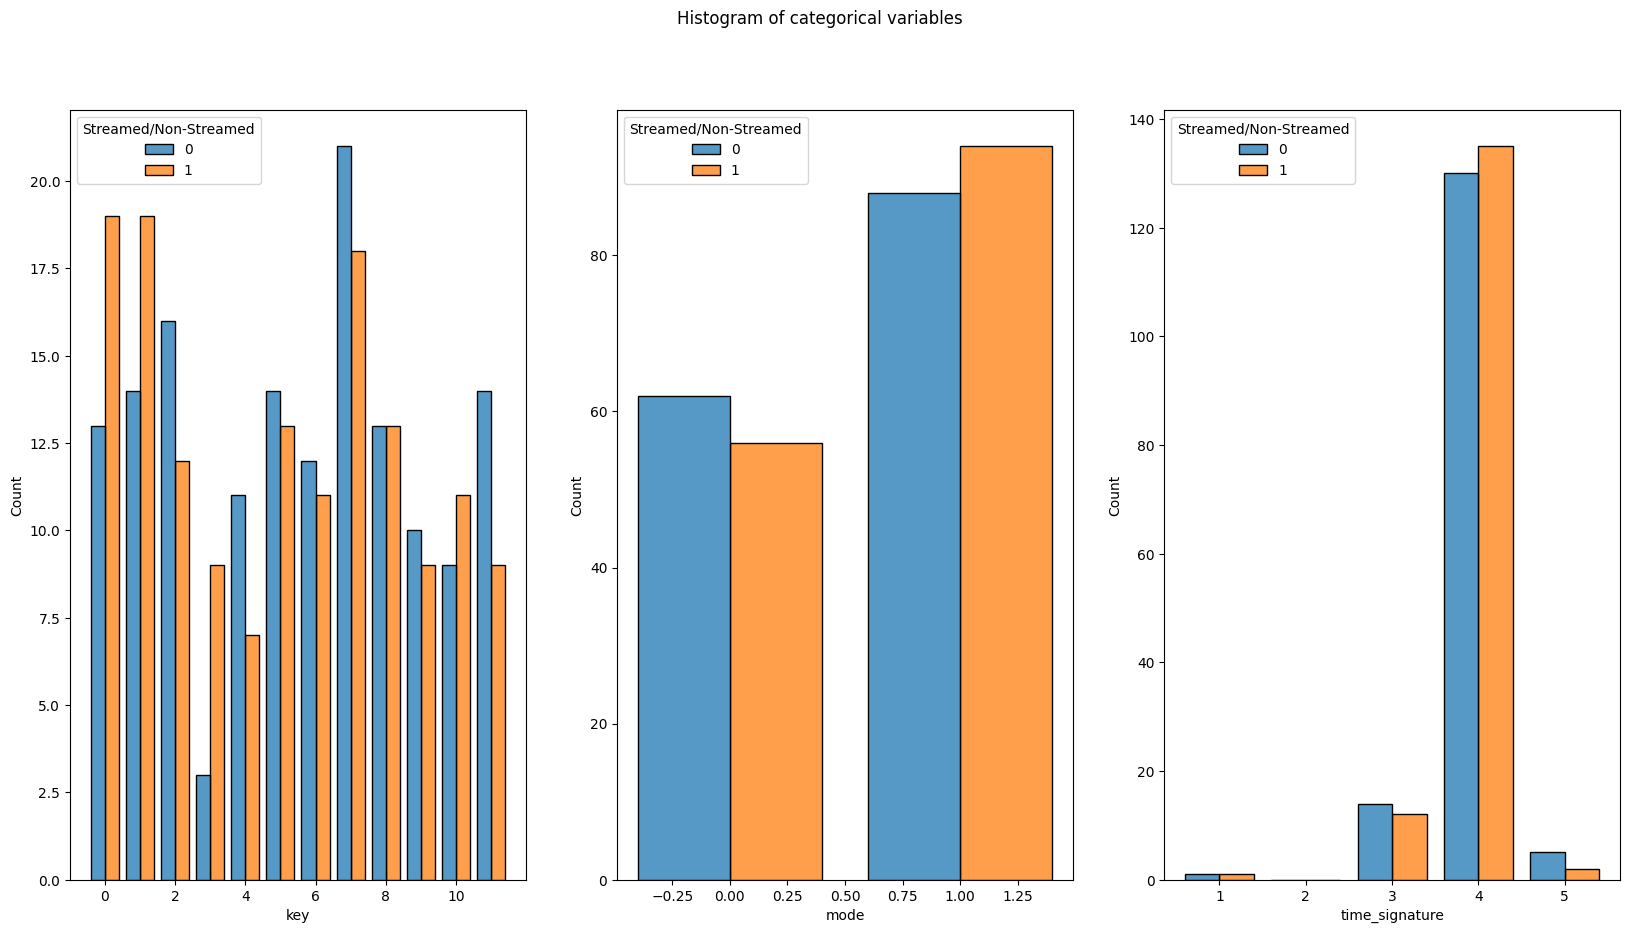

In [17]:
columns_name = ['key', 'mode','time_signature']
plot_categorical_variables(dataset, columns_name, 'Streamed/Non-Streamed')

**Analyse des variables catégorielles/Categorical variables analysis**


1.   Key/Gamme : On remarque que le nombre de sons streamés est très important dans la gamme de C/DO, C#/DO#, Eb/Mibémol (0,1,3) comparativement aux sons non streamés. / We note that the number of streamed sounds is very high in the C/DO, C#/DO#, Eb/Mibemol range (0,1,3) compared to unstreamed sounds.


2.   Mode : On peut déduire de ce graphe qu'on retrouve plus de sons dans les gammes mineures chez les non streamés. C'est l'inverse dans les gammes majeures. Ce qui rejoint quelque part l'analyse qu'on a faite sur la valence. / From this graph, we can deduce that non-streamers have more sounds in minor scales. The opposite is true of major scales. In a way, this ties in with our analysis of valency.


3.   Métrique/Time signature : Il y a un pic partagé autour de la métrique 4/4. La proportion est juste un peu plus élevée pour les hits. Mais on peut supposer que cette variable ne sera pas assez discriminative./ There's a shared peak around the 4/4 time signature. The proportion is just a little higher for hits. But we can assume that this variable will not be discriminatory enough.





In [161]:
"""#Quantile discretization of tempo column - 1 for slow tempo, 2 for moderate tempo, 3 for fast tempo, 4 for very fast tempo
dataset['tempo'] = pd.qcut(dataset['tempo'], 4, labels=[1,2,3,4])"""

"#Quantile discretization of tempo column - 1 for slow tempo, 2 for moderate tempo, 3 for fast tempo, 4 for very fast tempo\ndataset['tempo'] = pd.qcut(dataset['tempo'], 4, labels=[1,2,3,4])"

In [162]:
"""dataset.head()"""

'dataset.head()'

In [163]:
"""sns.histplot(data=dataset, x='tempo', hue='Streamed/Non-Streamed', discrete=True, multiple="dodge", shrink=0.8)"""

'sns.histplot(data=dataset, x=\'tempo\', hue=\'Streamed/Non-Streamed\', discrete=True, multiple="dodge", shrink=0.8)'